<img src="img/portada.png" width=1200>

<img src="img/eval.png" width=850>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<img src="img/al majzen.png" width=700>

In [2]:
#Depósito

# 1. Introducción al almacenamiento

Los almacenes, son los puntos nodales dentro de la cadena de suministro. El producto sigue en movimiento, aunque geográficamente no se desplaza, es decir toma una pausa. No importa si dicha pausa es breve. Esto genera un consumo de tiempo y espacio. El objetivo real de los almacenes es fomentar el flujo de los productos y mantener las pausas al mínimo. Se ha estimado que las actividades de almacenamiento pueden absorber hasta **20%** del costo de distribución de una empresa.

### ¿Por qué tener un almacén?

Existen diversas razones para tener un almacén a pesar del hecho de que generan un costo y no son baratos. Algunas de ellas se presentan a continuación:

* Para poder satisfacer cambios en la demanda del cliente

* Para consolidar el producto y reducir la transportación

* Reducción de los costos de producción - transportación

* Necesidades de producción

* Consideraciones de marketing

<img src="img/dist.png" width=600>

El objetivo de usar un almacén es usar solo la cantidad justa de stock con la que se alcance un **equilibro económico entre los costos de almacenamiento, producción y transportación.**

### Conceptos básicos relacionados a la teoría de almacenamiento

**La manufactura esbelta**, es una metodología en la cual se busca minimizar el desperdicio en los sistemas de manufactura mientras que al mismo tiempo se busca maximizar la productividad. Desde esta perspectiva, un desperdicio puede ser todo aquello extra a lo que esencialmente se necesita. Dentro de la filosofía de lean manufacturing, a los desperdicios se les denomina **MUDA**. MUDA, es un término japonés que significa “inutilidad; ociosidad; superfluo; residuos; despilfarro”.

<img src="img/muda.png">

###    PollEv.com/edgaravalos805

Cuando se inicia un proceso de evaluación de la gestión logística de una organización, es imperativo extraer un conjunto de indicadores conocidos como **KPI's** (Key Performance Indicators). Un KPI, debe poseer las características definidas en el acrónimo **SMART**:

<img src="img/ssmart.jpg">

Existen diferentes estudios y publicaciones en las que se proponen diferentes KPI's para el control de almacenes. A continuación se presentan algunos de estos:

* **Rotación de Inventario de Materias Primas:**
                            Costo de los productos vendidos
                            -------------------------------
                              Stock medio de materia prima

In [3]:
def rot_inventario_mp(Costo_prod_vendido, Stock_medio):
    return (float(Costo_prod_vendido/Stock_medio))

In [4]:
Mes=["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep","Oct", "Nov", "Dic"]
Ventas=[45,48.5,67,68.9,71.3,53.1,51.75,66.15,69,72,58,56.5]
Inventario=[8,8.2,9.3,10.2,12.6,8.15,8.5,9.7,10.75,13,8.9,9.2]

tabla=pd.DataFrame(data={"Ventas Acumuladas en millones":Ventas,"Valor promedio inventario en millones":Inventario}, index=Mes)
tabla

,Ventas Acumuladas en millones,Valor promedio inventario en millones
Ene,45.00,8.00
Feb,48.50,8.20
Mar,67.00,9.30
Abr,68.90,10.20
May,71.30,12.60
Jun,53.10,8.15
Jul,51.75,8.50
Ago,66.15,9.70
Sep,69.00,10.75
Oct,72.00,13.00


In [5]:
rot_inventario_mp(tabla["Ventas Acumuladas en millones"][0], tabla["Valor promedio inventario en millones"][0])

5.625

In [6]:
kpi_rot=[]
for i in range(12):
    a=rot_inventario_mp(tabla["Ventas Acumuladas en millones"][i], tabla["Valor promedio inventario en millones"][i])
    a=round(a,2)
    kpi_rot.append(a)

In [7]:
tabla["KPI_rot"]=kpi_rot
tabla

,Ventas Acumuladas en millones,Valor promedio inventario en millones,KPI_rot
Ene,45.00,8.00,5.62
Feb,48.50,8.20,5.91
Mar,67.00,9.30,7.20
Abr,68.90,10.20,6.75
May,71.30,12.60,5.66
Jun,53.10,8.15,6.52
Jul,51.75,8.50,6.09
Ago,66.15,9.70,6.82
Sep,69.00,10.75,6.42
Oct,72.00,13.00,5.54


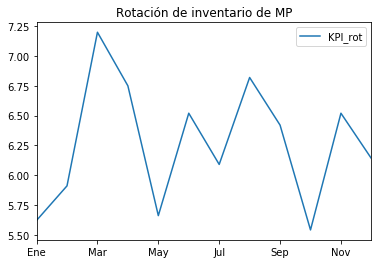

In [8]:
tabla.plot(y="KPI_rot", title="Rotación de inventario de MP")
plt.show()

* **Entregas a tiempo:**
                            Entregas a tiempo
                            ------------------
                            Total de entregas

In [9]:
def entregas_a_tiempo(entregas_tiempo, total_entregas):
    return(entregas_tiempo/total_entregas)

In [10]:
Mes=["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep","Oct", "Nov", "Dic"]
desp_atiempo=[4010,4200,4420,4450,4580,4700,4650,4490,5000,5090,4700,4620]
desp_req=[4200,4450,4630,4710,4820,4900,4860,4750,5200,5350,4900,4850]

tabla2=pd.DataFrame(data={"Despachos cumplidos a tiempo":desp_atiempo,"Despachos requeridos":desp_req}, index=Mes)
tabla2

,Despachos cumplidos a tiempo,Despachos requeridos
Ene,4010,4200
Feb,4200,4450
Mar,4420,4630
Abr,4450,4710
May,4580,4820
Jun,4700,4900
Jul,4650,4860
Ago,4490,4750
Sep,5000,5200
Oct,5090,5350


In [11]:
entregas_a_tiempo(tabla2["Despachos cumplidos a tiempo"], tabla2["Despachos requeridos"])

Ene    0.954762
Feb    0.943820
Mar    0.954644
Abr    0.944798
May    0.950207
Jun    0.959184
Jul    0.956790
Ago    0.945263
Sep    0.961538
Oct    0.951402
Nov    0.959184
Dic    0.952577
dtype: float64

In [12]:
entregas_a_tiempo(tabla2["Despachos cumplidos a tiempo"][11], tabla2["Despachos requeridos"][11])

0.9525773195876288

In [13]:
kpi_entregas=[]
for i in range(12):
    a=entregas_a_tiempo(tabla2["Despachos cumplidos a tiempo"][i], tabla2["Despachos requeridos"][i])
    a=round(a,4)
    kpi_entregas.append(a*100)

tabla2["KPI_entregas(%)"]=kpi_entregas
tabla2

,Despachos cumplidos a tiempo,Despachos requeridos,KPI_entregas(%)
Ene,4010,4200,95.48
Feb,4200,4450,94.38
Mar,4420,4630,95.46
Abr,4450,4710,94.48
May,4580,4820,95.02
Jun,4700,4900,95.92
Jul,4650,4860,95.68
Ago,4490,4750,94.53
Sep,5000,5200,96.15
Oct,5090,5350,95.14


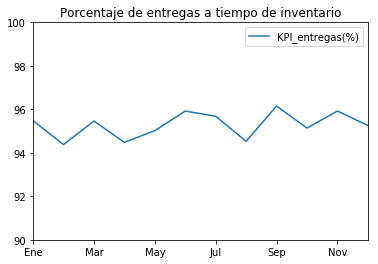

In [14]:
tabla2.plot(y="KPI_entregas(%)", title="Porcentaje de entregas a tiempo de inventario", ylim=(90,100))
plt.show()

* **Entregas completas:**
                            Entregas completas
                            ------------------ * (100)
                             Total de entregas

In [15]:
def entregas_completas(completas, total_entregas):
    return(completas/total_entregas)

* **Productividad en volumen movido:**
                                Volumen movido
                            ---------------------
                           Número de hrs trabajadas

In [16]:
def productividad_vol(vol_mov, horas):
    return(vol_mov/horas)

* **Productividad de entradas al almacén sobre el coste de la mano de obra:**
                            Número de unidades recibidas por almacen
                            ----------------------------------------
                               Costo de la mano de obra del almacén

In [17]:
def productividad_entradas(units_in, Mano_de_obra):
    return(units_in/Mano_de_obra)

* **Productividad de salidas del almacén sobre el coste de la mano de obra:**
                             Número de unidades salidas del almacen
                            ----------------------------------------
                              Costo de la mano de obra del almacén

In [18]:
def productividad_salidas(units_out, Mano_de_obra):
    return(units_out/Mano_de_obra)

* **Productividad referente a unidades logísticas procesadas en "picking"**:
                            Número de unidades logísticas recogidas en "picking"
                            --------------------------------------------------
                                       Número de horas trabajadas

In [19]:
def productividad_picking(picking, horas):
    return(picking/horas)

* **Porcentaje de utilización del espacio en el Centro de Distribución (CEDI)**:
                                Espacio utilizado
                            ----------------------------- * (100)
                            Espacio disponible en el CEDI

In [20]:
def superficie(usada, CEDI):
    return(usada/CEDI)

* **Unidades procesadas por metro cuadrado**:
                                     Unidades procesadas
                            ----------------------------------
                            Espacio disponible en el CEDI [m^2]
                            
                            
                            

In [21]:
def unidades_procesadas(procesadas, CEDI):
    return(procesadas/CEDI)

In [22]:
def KPI(Costo_prod_vendido=None, Stock_medio=None, entregas_tiempo=None, total_entregas=None,
        completas=None, vol_mov=None, horas=None, units_in=None, units_out=None, 
        Mano_de_obra=None, picking=None, usada=None, procesadas=None, CEDI=None):
    
    if Costo_prod_vendido!=None and Stock_medio!=None:
        print("El Inventario rota ",rot_inventario_mp(Costo_prod_vendido, Stock_medio),"veces")
        
    if entregas_tiempo!=None and total_entregas!=None:
        print(entregas_a_tiempo(entregas_tiempo, total_entregas)*100,"% de entregas a tiempo")
    
    if entregas_completas!=None and total_entregas!=None:
        print(entregas_completas(completas, total_entregas)*100,"% de entregas completas")
    
    if vol_mov!=None and horas!=None:
        print(productividad_vol(vol_mov, horas)*100,"% de productividad de volumen movido")
    
    if units_in!=None and Mano_de_obra!=None:
        print(productividad_entradas(units_in, Mano_de_obra)*100,"% de productividad en el manejo de entradas")
    
    if units_out!=None and Mano_de_obra!=None:
        print(productividad_salidas(units_out, Mano_de_obra)*100,"% de productividad en el manejo de salidas")
    
    if picking!=None and horas!=None:
        print(productividad_picking(picking, horas)*100,"% de productividad en el área de 'picking'")
    
    if usada!=None and CEDI!=None:
        print(superficie(usada, CEDI)*100,"% utilizado de la superficie del CEDI")
    
    if unidades_procesadas!=None and CEDI!=None:
        print(unidades_procesadas(procesadas, CEDI)*100,"% de unidades procesadas por superficie del CEDI")

In [23]:
KPI(500,400)

El Inventario rota  1.25 veces


In [24]:
KPI(Costo_prod_vendido=200, Stock_medio=100, entregas_tiempo=75, total_entregas=200,
        completas=150, vol_mov=200, horas=900, units_in=600, units_out=500, 
        Mano_de_obra=800, picking=200, usada=67, procesadas=150, CEDI=100)

El Inventario rota  2.0 veces
37.5 % de entregas a tiempo
75.0 % de entregas completas
22.22222222222222 % de productividad de volumen movido
75.0 % de productividad en el manejo de entradas
62.5 % de productividad en el manejo de salidas
22.22222222222222 % de productividad en el área de 'picking'
67.0 % utilizado de la superficie del CEDI
150.0 % de unidades procesadas por superficie del CEDI


### Tendencias y retos de los centros de distribución y almacenes

Cada año en la industria se desarrollan nuevas tendencias y retos. En un reporte realizado por la **"Warehousing Education and Research Council" (WERC)**, para finales del 2018, existen 4 áreas de oportunidad relacionadas con el manejo y control de los centros de distribución y almacenes.

<img src="img/tendencias.png">

#### Disminuir las brechas de desempeño

Las brechas de desmpeño hacen referencia a **reducir la diferencia que existe entre aquellas industrias que se desempeñan de la mejor forma, y aquellas que representan la mayor área oportunidad para propiciar un mejor desempeño.**

Las industrias que ya se encuentran en el mejor punto de desempeño, requieren de mayor investigación, mayores recursos y tomar mayores riesgos para poder continuar en la senda de la mejora. Por otro lado, aquellas industrias que representan la mayr área de oportunidad, pueden lograr mejorar sus prácticas y con ello mejorar su competitividad solamente mediante técnicas más sencillas.

#### Uso de las oportunidades tecnológicas adecuadas

El uso de la tecnología, como parte de la cadena de suministro a tomado un rol esencial en los últimos años. Muchas compañias se han enfocado recientemente en implementar una transformación digital. Sin embargo, el uso de nuevas tecnologías no solo hace referencia a análisis de "Big Data" o la implementación de tecnologías móviles. **Actualmente 35% de los centros de distribución no cuentan con un sistema de administración para el almacén, y peor aún, un 25% no utiliza el escaneo de códigos de barras.**

#### Falta de consistencia

Si no existe consistencia en el desarrollo de los procesos dentro de un almacén, entonces no es posible desarrollar técnicas de mejora, o implementar nuevas tecnologías para un mejor control. La consistencia es la llave para llevar a los centros de distribución y los almacenes a mantener los niveles de desempeño idóneos.

#### Desarrollo del personal

La gente sigue siendo, y seguirá siendo la fuerza motriz detras de la cadena de suministro. Los mejores resultados siempre provienen de aquellas industrias que invierten en su personal, antes de invertir en medios externos. 

## 1.1 Tipos de almacenes

Un almacén se puede categorizar por el tipo de cliente al que sirven. A continuación se presentan algunos de los más importantes:

* **Almacén de productos o mercancias fijos**

Estos almacenes limitan sus servicios a guardar y manejar ciertas mercancías, como madra, algodón, tabaco, grano, etc.

* **Centro de distribución de comercio al por menor**

<img src="img/retail.png" width= 500>

Este tipo de centro de distribución se caracteriza por que sus clientes solicitan mercancia de una forma regular y calendarizada. Una sola orden puede estar compuesta por cientos de miles de artículos.

* **Centro de distribución de servicio de partes**

Este tipo de centro de distribución, **almacenan partes para equipos considerados como caros**. Ejemplos de esto son los **automóviles, los aviones, los equipos de computo, o el equipo médico**. En consecuencia, un almacen puede representar una inmensa inversión en inventario. Debido al gran número de partes, la actividad dentro del almacen puede ser predecida estadísticamente, sin embargo la demanda al ser pequeña, se vuelve impredecible y con una varianza grande. Es por ello que el nivel de stock debe de ser alto, para evitar demoras a la entrega, y soportar las demoras al momento de recibir nuevos productos.

<img src="img/ordenes.png" width= 750>

* **Centro de distribución de e-commerce**

Este tipo de centro de distribución procesa órdenes pequeñas (de 1 a 3 artículos). Las órdenes se reciven por medio del teléfono o el internet. Es por esto que el número de ordenes es mucho mayor. Para poder proporcionar el servicio, este tipo de centros de distribución maneja fechas de entregas mas abiertas.

<img src="img/ecomerce.png" width= 750>

* **Centro de distribución 3PL (Third party logistics)**

Este tipo de centro de distribución implica que la compañia subcontrata a otra compañia para que se haga cargo de sus operaciones de almacenaje. El proveedor de 3PL puede atender a varios clientes al mismo tiempo. La estacionalidad no afecta sus operaciones ya que puede atender a diferentes clientes en momentos del años distintos. Este tipo de centro de distribución tambien se puede utilizar para complementar una entrega cuando exista un incremento en el flujo de productos solicitados por el cliente, y que el centro de distribución de la compañia no pueda manejar.

<img src="img/3PL.jpg" width= 750>

* **Centro de distribución de objetos perecederos (Almacenes de temperatura controlada)**

Este centro de distribución se caracteriza por el manejo de productos que necesitan refrigeración. Ejemplos de esto son los alimentos, plantas, vacunas, etc. Debido a los altos costos de la refrigeración, este tipo de centro de distribución hace mucho énfasis en el pronto manejo de los productos (tiempo) y en optimizar el espacio en el almacén (volumen). Tradicionalmente utilizan el sistema FIFO (First-In-First-Out) or FEFO (First-Expired-First-Out). Tambien es importante tomar en cuenta que los productos tendran una mayor cantidad de restricciones en comparación de otros productos que no requieran refrigeración.

<img src="img/perecedero.jpg" width= 600>

### Logística y el margen del precio del producto

La selección del centro de distribución más adecuado dará como resultado una reducción en los costos de transporte del producto. Los costos de transporte generan un margen de incremento que se verá reflejado en el precio final del producto.

<img src="img/margen.png" width= 600>

Para obtener el precio de venta al público de un producto, se calcula a partir de margen generado:

$P_{2}=P_{1}+M_{1}*P_{1}$

Factorizando resulta en:

$P_{2}=P_{1}*(1+M_{1})$

Para $P_{3}$ el procedimiento es el mismo que con $P_{2}$:

$P_{3}=P_{2}*(1+M_{2})$

Generalizando:

$P_{venta}=P_{1}*(1+M_{1})*...*(1+M_{n})$

In [25]:
# Creamos una función para el cálculo del precio de venta.
# El primer argumento corresponde al precio de la Materia Prima
# El segundo argumento acepta valores múltiples, y corresponde a los diferentes márgenes.

def precio_venta(MP,*margen):
    precio=MP
    for i in margen:
        precio=precio*(1+i)
    return(precio)

Un productor adquiere una materia prima cuyo coste es de $25. Después del proceso de producción, al producto final se le añade un margen del 15%. Determine el precio de venta del producto:

In [26]:
round(precio_venta(25,0.15),2)

28.75

Si posteriormente se le agrega un segundo margen del 30%, ¿Cuál es el nuevo precio de vental del producto?

In [27]:
precio_venta(25,0.15,0.3)

37.375

### Ejercicio

Un fabricante saca a la venta un determinado producto cuyo precio es de $85. El producto se deposita en tres almacenes antes de llegar al punto de venta, los cuales añaden unos márgenes del 7, 8.5, y 12% respectivamente. Al llegar al pundo de venta, la tienda le aplica un margen del 65%. Determine el precio de venta final del producto:

## 1.2 Características de los productos a almacenar

Poder determinar las características de los productos a almacenar ayudará a tener un ágil movimiento (flujo) de los productos dentro del almacen. Sin embargo, los productos no se manejan como el flujo de un caudal, estos se mueven en grupos de diferentes tamaños. Las características físicas de un producto, cualquier requerimiento específico del embalaje y el tipo de unidad de carga, son factores muy importantes al intentar minimizar los costos totales para niveles de servicio dado. Las dimensiones básicas a considerar son:

* **Peso Neto**: se trata del peso de la mercancía, excluido cualquier tipo de embalaje que pueda llevar (cajas, pallets, etc.). Se puede expresar en kilogramos (kg) o toneladas (Ton), o en libras (lbs).

* **Peso Bruto**: se trata del peso de la mercancía, incluidos todos sus embalajes. En inglés se dice gross weight y lo veremos habitualmente con las siglas GW. Se expresa en las mismas unidades que el peso neto.

* **Volumen**: se trata del espacio físico que ocupa la mercancía, expresado generalmente en metros cúbicos (m3).

Esto es de suma importancia ya que la administración del almacen gira alrededor de dos variables: **espacio** y **tiempo**.
La mejor forma de analizar estas 2 variables, es a partir de sus correspondientes ratios:

                      volumen                            valor
      ratio_volumen = -------              ratio_peso = -------
                       peso                               peso

In [28]:
def ratio_vol_weight(volume,weight):
    return(volume/weight)

In [29]:
def ratio_val_weight(value,weight):
    return (value/weight)

In [30]:
def stock_ratio(volume=None, value=None, weight=None):
    if volume!=None and weight!=None:
        print("La relación de aspecto entre volumen y peso es:", ratio_vol_weight(volume,weight))
    if value!=None and weight!=None:
        print("La relación de aspecto entre valor y peso es:", ratio_val_weight(value,weight))

In [31]:
stock_ratio(25,50,100)

La relación de aspecto entre volumen y peso es: 0.25
La relación de aspecto entre valor y peso es: 0.5


In [32]:
df=pd.read_csv("Data_sets\Warehouse_file.csv", index_col="Product_Code")

In [33]:
df.head()

,Warehouse,Product_Category,Date,Unit_price,Order_Demand,Stock,Volume_m3,Weight_Kg,Value
Product_Code,,,,,,,,,
Product_0993,Whse_J,Category_028,27/07/2012,16,100,110,2.985,74,735.6
Product_0979,Whse_J,Category_028,19/01/2012,39,500,550,0.932,185,574.2
Product_0979,Whse_J,Category_028,03/02/2012,65,500,550,0.631,95,199.6
Product_0979,Whse_J,Category_028,09/02/2012,69,500,525,3.229,187,2010.7
Product_0979,Whse_J,Category_028,02/03/2012,51,500,525,2.762,93,855.4


In [34]:
df.dtypes

Warehouse            object
Product_Category     object
Date                 object
Unit_price            int64
Order_Demand          int64
Stock                 int64
Volume_m3           float64
Weight_Kg             int64
Value               float64
dtype: object

In [35]:
df.Warehouse.value_counts()

Whse_J    764447
Whse_A    153574
Whse_S     88200
Whse_C     42354
Name: Warehouse, dtype: int64

In [36]:
df_J=df[df["Warehouse"]=="Whse_J"]
df_J.shape

(764447, 9)

In [37]:
df_A=df[df["Warehouse"]=="Whse_A"]
df_A.shape

(153574, 9)

In [38]:
df_S=df[df["Warehouse"]=="Whse_S"]
df_S.shape

(88200, 9)

In [39]:
df_C=df[df["Warehouse"]=="Whse_C"]
df_C.shape

(42354, 9)

In [40]:
df_C.Product_Category.value_counts()

Category_019    17067
Category_007     5934
Category_005     3776
Category_015     2893
Category_024     2356
Category_030     2274
Category_001     2177
Category_023     1999
Category_021     1541
Category_006      947
Category_009      588
Category_011      371
Category_032      202
Category_012      162
Category_020       48
Category_008       19
Name: Product_Category, dtype: int64

In [41]:
df_C.head()

,Warehouse,Product_Category,Date,Unit_price,Order_Demand,Stock,Volume_m3,Weight_Kg,Value
Product_Code,,,,,,,,,
Product_1581,Whse_C,Category_005,10/01/2012,31,2000,2100,1.229,44,180.1
Product_1581,Whse_C,Category_005,09/02/2012,79,2000,2200,2.627,99,866.0
Product_1581,Whse_C,Category_005,13/02/2012,28,5000,5250,0.484,162,261.1
Product_2015,Whse_C,Category_005,24/02/2012,97,2000,2200,0.872,179,519.8
Product_1581,Whse_C,Category_005,29/02/2012,9,5000,5500,0.209,41,28.5


In [42]:
df_C.columns

Index(['Warehouse', 'Product_Category', 'Date', 'Unit_price', 'Order_Demand',
       'Stock', 'Volume_m3', 'Weight_Kg', 'Value'],
      dtype='object')

In [43]:
len(df_C)

42354

In [44]:
df_C.shape

(42354, 9)

In [45]:
lista_ratios_1=[]
for i in range(len(df_C)):
    a=ratio_vol_weight(df_C.Volume_m3[i],df_C.Weight_Kg[i])
    lista_ratios_1.append(a)

In [46]:
lista_ratios_1

[0.027931818181818183,
 0.026535353535353533,
 0.002987654320987654,
 0.0048715083798882685,
 0.005097560975609756,
 0.0009435483870967741,
 0.3372,
 0.013476821192052981,
 0.006078651685393259,
 0.05706896551724138,
 0.02059333333333333,
 0.008060975609756098,
 0.020081395348837208,
 0.22835714285714287,
 0.0052197309417040365,
 0.004921428571428572,
 0.002466165413533834,
 0.008686567164179105,
 0.01743125,
 0.14231249999999998,
 0.0017116564417177912,
 0.03207843137254902,
 0.013657276995305164,
 0.016679245283018868,
 0.00275,
 0.004111627906976744,
 0.001901639344262295,
 0.02001734104046243,
 0.005022471910112359,
 0.03422680412371134,
 0.012043478260869565,
 0.005409090909090909,
 0.006731843575418995,
 0.025020408163265305,
 0.004231578947368421,
 0.01838157894736842,
 0.011846491228070176,
 0.02051655629139073,
 0.007721311475409836,
 0.0052139917695473255,
 0.04811864406779661,
 0.015722222222222224,
 0.011986394557823127,
 0.03635,
 0.04573333333333333,
 0.0306036036036036,


In [47]:
df_C["Ratio_m3_Kg"]=lista_ratios_1
df_C.head()

C:\Users\eavalos\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Warehouse,Product_Category,Date,Unit_price,Order_Demand,Stock,Volume_m3,Weight_Kg,Value,Ratio_m3_Kg
Product_Code,,,,,,,,,,
Product_1581,Whse_C,Category_005,10/01/2012,31,2000,2100,1.229,44,180.1,0.027932
Product_1581,Whse_C,Category_005,09/02/2012,79,2000,2200,2.627,99,866.0,0.026535
Product_1581,Whse_C,Category_005,13/02/2012,28,5000,5250,0.484,162,261.1,0.002988
Product_2015,Whse_C,Category_005,24/02/2012,97,2000,2200,0.872,179,519.8,0.004872
Product_1581,Whse_C,Category_005,29/02/2012,9,5000,5500,0.209,41,28.5,0.005098


In [48]:
df_C["%Ratio_m3_Kg"]=df_C["Ratio_m3_Kg"]*100
df_C

C:\Users\eavalos\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Warehouse,Product_Category,Date,Unit_price,Order_Demand,Stock,Volume_m3,Weight_Kg,Value,Ratio_m3_Kg,%Ratio_m3_Kg
Product_Code,,,,,,,,,,,
Product_1581,Whse_C,Category_005,10/01/2012,31,2000,2100,1.229,44,180.1,0.027932,2.793182
Product_1581,Whse_C,Category_005,09/02/2012,79,2000,2200,2.627,99,866.0,0.026535,2.653535
Product_1581,Whse_C,Category_005,13/02/2012,28,5000,5250,0.484,162,261.1,0.002988,0.298765
Product_2015,Whse_C,Category_005,24/02/2012,97,2000,2200,0.872,179,519.8,0.004872,0.487151
Product_1581,Whse_C,Category_005,29/02/2012,9,5000,5500,0.209,41,28.5,0.005098,0.509756
Product_1581,Whse_C,Category_005,09/03/2012,13,6000,6300,0.117,124,48.3,0.000944,0.094355
Product_1581,Whse_C,Category_005,15/03/2012,49,10000,11000,3.372,10,112.3,0.337200,33.720000
Product_1581,Whse_C,Category_005,22/03/2012,76,2000,2100,2.035,151,1023.3,0.013477,1.347682
Product_2015,Whse_C,Category_005,26/03/2012,47,1000,1050,1.082,178,641.3,0.006079,0.607865


In [49]:
df_C['Date']=pd.to_datetime(df_C['Date'], dayfirst=True, format='%d/%m/%Y')
df_C

C:\Users\eavalos\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Warehouse,Product_Category,Date,Unit_price,Order_Demand,Stock,Volume_m3,Weight_Kg,Value,Ratio_m3_Kg,%Ratio_m3_Kg
Product_Code,,,,,,,,,,,
Product_1581,Whse_C,Category_005,2012-01-10,31,2000,2100,1.229,44,180.1,0.027932,2.793182
Product_1581,Whse_C,Category_005,2012-02-09,79,2000,2200,2.627,99,866.0,0.026535,2.653535
Product_1581,Whse_C,Category_005,2012-02-13,28,5000,5250,0.484,162,261.1,0.002988,0.298765
Product_2015,Whse_C,Category_005,2012-02-24,97,2000,2200,0.872,179,519.8,0.004872,0.487151
Product_1581,Whse_C,Category_005,2012-02-29,9,5000,5500,0.209,41,28.5,0.005098,0.509756
Product_1581,Whse_C,Category_005,2012-03-09,13,6000,6300,0.117,124,48.3,0.000944,0.094355
Product_1581,Whse_C,Category_005,2012-03-15,49,10000,11000,3.372,10,112.3,0.337200,33.720000
Product_1581,Whse_C,Category_005,2012-03-22,76,2000,2100,2.035,151,1023.3,0.013477,1.347682
Product_2015,Whse_C,Category_005,2012-03-26,47,1000,1050,1.082,178,641.3,0.006079,0.607865


In [50]:
df_C.Date.dtype

dtype('<M8[ns]')

In [51]:
serie=list(df_C["%Ratio_m3_Kg"])
indice=list(df_C["Date"])

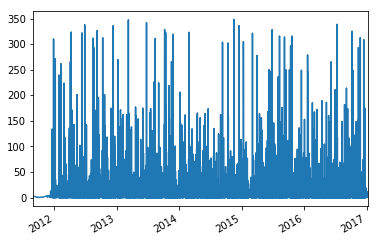

In [52]:
serie_tiempo = pd.Series(data=serie, index=indice, name='Serie de tiempo')
serie_tiempo.plot()

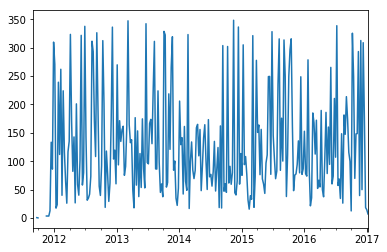

In [53]:
serie_tiempo.resample('7D').agg("max").plot()

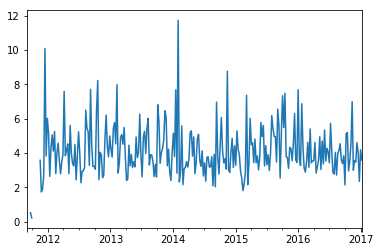

In [54]:
serie_tiempo.resample('7D').agg("mean").plot()

## 1.3 Sistemas de transporte interno

Dentro de los almacenes, es necesario poder mover la mercancía desde los puntos de recepción, hasta su ubicación en la que son requeridos. Para ello se cuenta con sistemas de transporte interno. El nivel de uso de estos sistemas, condiciona la distribución, el rendimiento y el número de operarios que son precisos en la instalación.

<img src="img/Transporte interno.png" width=900>

Ciertos datos básicos de los equipos de transporte influyen en la distribución de un almacén. Ejemplo de esto son **los tipos de máquinas que se usan, sus medidas, el pasillo de maniobra que se necesita para operar, la altura máima de elevación de mercancía que alcanzan y la cantidad de mercancía que manejan.** 

<img src="img/trasporte_interno.png" width=900>

### Consideraciones del manejo de materiales

Las consideraciones del manejo de materiales son una parte importante en el diseño del almacen y la selección de equipo para sus traslados. La mejora de la eficiencia en el manejo de materiales se desarrolla paralela a cuatro líneas: **agrupamiento de la carga, distribución del espacio del almacén, elección del equipo de almacenamiento y elección del equipo de movimiento.**

<img src="img\manejo de materiales.png" alt="Python" width="1000"/>

Las variables de mayor impacto en la toma de decisión para la proyección de un almacen son: **espacio, tiempo, costo.**

<img src="img\kahoot.jpg" alt="Python" width="600"/>

## 1.4 Sistemas de almacenamiento

El sistema de almacenamiento puede separarse en dos funciones importantes: **la poseción**(almacenamiento) y **el manejo** (o manipulación) de materiales. El manejo se refiere a las actividades de carga y descarga, al traslado del producto hacia y desde las diversas ubicaciones dentro del almacén y a recoger el pedido. El almacenamiento simplemente es la acumulación de inventario en el tiempo.

### Sistemas FEFO, FIFO Y LIFO EN ALMACENAMIENTO

Los sistemas FEFO, FIFO y LIFO tienen que ver con la forma en la que se mueven las mercancías a través de almacén. Dependiendo las caracteristicas de los productos dentro del almacén, es como se debe de seleccionar la técnica más adecuada de manejo de materiales. Para poder hacer esta selección es importante entender que significa cada una:

* **FEFO (“First Expired, First Out”)**: significa "primero en caducar primero en salir", con este método los productos con fechas de caducidad más cercanas tendrían que ser los primeros en salir del almacén. Los alimentos, las plantas, e incluso los medicamentos son ejemplos de materiales que utilizan este tipo de técnica.


* **FIFO (“First In, First Out”)**: significa “primero en entrar, primero en salir”. Se da prioridad de salida a aquellos productos con mayor antigüedad dentro del almacén. Ejemplos de productos que utilizan este tipo de técnica son los textiles (moda) o dispositivos electrónicos (tecnología), los cuales pueden pasar de moda en función del tiempo.


* **LIFO (“Last In, First Out”)**: significa “último en entrar, primero en salir”. Sistema perfecto para aquellos productos no perecederos y la antigüedad o la fecha de caducidad no son factores a considerar.

### Sistema tipo ABC

<img src="img\pareto.png" alt="Python" width="800"/>

El **principio de Pareto** recibe su nombre del Ingeniero y Economista Vilfredo Pareto, quien lo enunció por primera vez en 1906. Pareto mencionó que **el 20% de la población poseía el 80% de la propiedad en Italia.** Dicha afirmación sería posteriormente generalizada por el Ingeniero Joseph M. Juran como el principio de Pareto (También conocida como la regla del 80-20). En dicha generalización, Juran estableció que **para varios eventos, aproximadamente el 80% de los efectos viene dado por el 20% de las causas.**

A partir de este principio, surge el método de categorización de inventario conocido como ABC. Los artículos son categorizados de acuerdo a su uso o a su valor. Los artículos de categoría A seran los elementos sobre los que se deberá centrar la atención durante la administración del almacén.

Los artículos de **categoría A** representarán el **70-80% del valor anual de consumo del almacen**, mientras que dichos artículos solo representarán del **10-20% del total de artículos en el inventario**.
Los artículos de **categoría B** tienen un nivel de consumo que puede ser considerado como medio. Representa un **15-25% del valor anual de consumo del almacen**. Estos artículos representarán aproximadamente el **30% del total de artículos en el inventario**.
Los artículos de **categoría C** por el contrario, representan el nivel mas bajo de consumo. Este puede tener un valor aproximado del **5-10% del valor anual de consumo del almacen**. Regularmente, los artículos de categoría C pueden llegar a representar el **50% del total de artículos en el inventario**.

A través de esta categorización, es posible identificar zonas de alta circulación de artículos, y así mismo aquellos artículos que son numerosos pero que no son rentables.

In [55]:
df_C.head()

,Warehouse,Product_Category,Date,Unit_price,Order_Demand,Stock,Volume_m3,Weight_Kg,Value,Ratio_m3_Kg,%Ratio_m3_Kg
Product_Code,,,,,,,,,,,
Product_1581,Whse_C,Category_005,2012-01-10,31,2000,2100,1.229,44,180.1,0.027932,2.793182
Product_1581,Whse_C,Category_005,2012-02-09,79,2000,2200,2.627,99,866.0,0.026535,2.653535
Product_1581,Whse_C,Category_005,2012-02-13,28,5000,5250,0.484,162,261.1,0.002988,0.298765
Product_2015,Whse_C,Category_005,2012-02-24,97,2000,2200,0.872,179,519.8,0.004872,0.487151
Product_1581,Whse_C,Category_005,2012-02-29,9,5000,5500,0.209,41,28.5,0.005098,0.509756


In [56]:
nueva=df_C.reset_index()
nueva.head()

,Product_Code,Warehouse,Product_Category,Date,Unit_price,Order_Demand,Stock,Volume_m3,Weight_Kg,Value,Ratio_m3_Kg,%Ratio_m3_Kg
0,Product_1581,Whse_C,Category_005,2012-01-10,31,2000,2100,1.229,44,180.1,0.027932,2.793182
1,Product_1581,Whse_C,Category_005,2012-02-09,79,2000,2200,2.627,99,866.0,0.026535,2.653535
2,Product_1581,Whse_C,Category_005,2012-02-13,28,5000,5250,0.484,162,261.1,0.002988,0.298765
3,Product_2015,Whse_C,Category_005,2012-02-24,97,2000,2200,0.872,179,519.8,0.004872,0.487151
4,Product_1581,Whse_C,Category_005,2012-02-29,9,5000,5500,0.209,41,28.5,0.005098,0.509756


In [57]:
nueva.Product_Category.value_counts()

Category_019    17067
Category_007     5934
Category_005     3776
Category_015     2893
Category_024     2356
Category_030     2274
Category_001     2177
Category_023     1999
Category_021     1541
Category_006      947
Category_009      588
Category_011      371
Category_032      202
Category_012      162
Category_020       48
Category_008       19
Name: Product_Category, dtype: int64

In [58]:
tabla_pareto=nueva.iloc[:,[2,4,5,6]]
tabla_pareto.head()

,Product_Category,Unit_price,Order_Demand,Stock
0,Category_005,31,2000,2100
1,Category_005,79,2000,2200
2,Category_005,28,5000,5250
3,Category_005,97,2000,2200
4,Category_005,9,5000,5500


In [59]:
tabla_pareto["Inversion"]=tabla_pareto["Unit_price"]*tabla_pareto["Order_Demand"]
tabla_pareto.head()

C:\Users\eavalos\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Product_Category,Unit_price,Order_Demand,Stock,Inversion
0,Category_005,31,2000,2100,62000
1,Category_005,79,2000,2200,158000
2,Category_005,28,5000,5250,140000
3,Category_005,97,2000,2200,194000
4,Category_005,9,5000,5500,45000


In [60]:
type(tabla_pareto)

pandas.core.frame.DataFrame

In [61]:
tabla_pareto_agrupada=tabla_pareto.groupby(["Product_Category"]).count()

In [62]:
tabla_pareto_agrupada.sort_values("Inversion", inplace=True, ascending=False,)
tabla_pareto_agrupada.reset_index(inplace=True)
tabla_pareto_agrupada

,Product_Category,Unit_price,Order_Demand,Stock,Inversion
0,Category_019,17067,17067,17067,17067
1,Category_007,5934,5934,5934,5934
2,Category_005,3776,3776,3776,3776
3,Category_015,2893,2893,2893,2893
4,Category_024,2356,2356,2356,2356
5,Category_030,2274,2274,2274,2274
6,Category_001,2177,2177,2177,2177
7,Category_023,1999,1999,1999,1999
8,Category_021,1541,1541,1541,1541
9,Category_006,947,947,947,947


In [63]:
tabla_pareto_agrupada.Inversion.describe()

count       16.000000
mean      2647.125000
std       4165.636148
min         19.000000
25%        328.750000
50%       1770.000000
75%       2490.250000
max      17067.000000
Name: Inversion, dtype: float64

In [64]:
tabla_pareto_agrupada["Inversion_acumulada"]=tabla_pareto_agrupada["Inversion"].cumsum()
tabla_pareto_agrupada.head()

,Product_Category,Unit_price,Order_Demand,Stock,Inversion,Inversion_acumulada
0,Category_019,17067,17067,17067,17067,17067
1,Category_007,5934,5934,5934,5934,23001
2,Category_005,3776,3776,3776,3776,26777
3,Category_015,2893,2893,2893,2893,29670
4,Category_024,2356,2356,2356,2356,32026


In [65]:
tabla_pareto_agrupada["Porcentaje_acumulado"]=tabla_pareto_agrupada["Inversion_acumulada"]/tabla_pareto_agrupada["Inversion"].sum()*100
tabla_pareto_agrupada.head()

,Product_Category,Unit_price,Order_Demand,Stock,Inversion,Inversion_acumulada,Porcentaje_acumulado
0,Category_019,17067,17067,17067,17067,17067,40.296076
1,Category_007,5934,5934,5934,5934,23001,54.306559
2,Category_005,3776,3776,3776,3776,26777,63.221892
3,Category_015,2893,2893,2893,2893,29670,70.052415
4,Category_024,2356,2356,2356,2356,32026,75.615054


In [66]:
def categoria_abc(x):
    if x<=80:
        return("A")
    elif x>80 and x<=90:
        return("B")
    else:
        return("C")

In [67]:
categoria_abc(80)

'A'

In [68]:
categoria_abc(90)

'B'

In [69]:
categoria_abc(95)

'C'

In [70]:
clasificacion=list(map(categoria_abc,tabla_pareto_agrupada["Porcentaje_acumulado"]))
len(clasificacion)

16

In [71]:
tabla_pareto_agrupada["Clasificacion"]=clasificacion
tabla_pareto_agrupada.head()

,Product_Category,Unit_price,Order_Demand,Stock,Inversion,Inversion_acumulada,Porcentaje_acumulado,Clasificacion
0,Category_019,17067,17067,17067,17067,17067,40.296076,A
1,Category_007,5934,5934,5934,5934,23001,54.306559,A
2,Category_005,3776,3776,3776,3776,26777,63.221892,A
3,Category_015,2893,2893,2893,2893,29670,70.052415,A
4,Category_024,2356,2356,2356,2356,32026,75.615054,A


In [72]:
tabla_pareto_agrupada.dtypes

Product_Category         object
Unit_price                int64
Order_Demand              int64
Stock                     int64
Inversion                 int64
Inversion_acumulada       int64
Porcentaje_acumulado    float64
Clasificacion            object
dtype: object

In [74]:
from Modulos import Pareto

In [75]:
dir(Pareto)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'pareto_plot']


Tabla Pareto

  Product_Category  Order_Demand  ponderado  % acumulado
0     Category_019         17067   0.402961          40%
1     Category_007          5934   0.140105          54%
2     Category_005          3776   0.089153          63%
3     Category_015          2893   0.068305          70%
4     Category_024          2356   0.055626          76%
5     Category_030          2274   0.053690          81%
6     Category_001          2177   0.051400          86%
7     Category_023          1999   0.047197          91%
8     Category_021          1541   0.036384          94%
9     Category_006           947   0.022359          97%



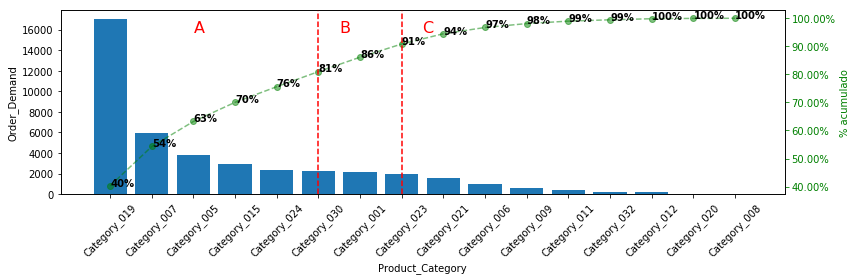

In [76]:
Pareto.pareto_plot(tabla_pareto_agrupada,"Product_Category", "Order_Demand")

## 1.5 Costos de almacenamiento y manipulación

Contar con la habilidad para poder calcular y reportar de forma correcta los costos reales de almacenamiento, es de suma importancia para la planeación financiera, logística y de diseño del almacén. Existen muchos factores a considerar para poder determinar los costos de almacenamiento y manipulación. Poder crear un registro de esta información podrá parecer complejo, sin embargo es el paso inicial para cualquier compañia para poder determinar la clase de mejoras que se prodrían implementar.

El primer dato para poder iniciar el cálculo, es la **superficie total del almacén**. Para esto es importante considerar la superficie exterior del almacén, y no las medidas que se pudieran obtener por dentro del mismo. Posterior al espacio utilizado, es necesario conocer los costos de las **instalaciones**; estas inclyen a todos los elementos fijos dentro del almacén. Un ejemplo claro son las estanterías, su reparación, mantenimiento, manejo, etc. El siguiente punto a considerar son los **recursos técnicos y humanos** para el manejo y manipulación de las mercancías. Personal que trabaja dentro del almacén, la compra de los equipos de traslado y operación del stock, son alungos ejemplos de los recursos a considerar. Finalmente es importante tomar en cuenta los costos **administrativos** que se generan durante las labores para el manejo del almacén. Seguridad interna, materiales de oficina, seguridad social, electricidad, entre otros son ejemplos de gastos administrativos.

Una situación extra a considerar al momento de analizar los costos generados dentro de un almacén son los famosos **costos ocultos** que se generan por malos manejos de la mercancía. Estos pueden ser pérdidas de stock, stock obsoleto o un sobreinventario de productos.